Found 78000 images belonging to 26 classes.
Found 26 images belonging to 26 classes.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 32, 32, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 32, 32, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 32, 32, 32)   0           ['bn_Conv1[0][0]']               
         

                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 8, 8, 144)   1296        ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 8, 8, 144)   576         ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 8, 8, 144)    0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 8, 8, 32)     4608        ['block_3_depthwise_relu[0][0]'] 
          

                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 4, 4, 384)   1536        ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 4, 4, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 4, 4, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 4, 4, 384)   1536        ['block_7_depthwise[0][0]']      
 malizatio

 block_10_project (Conv2D)      (None, 4, 4, 96)     36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 4, 4, 96)    384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 4, 4, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 4, 4, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_

 block_14_depthwise_BN (BatchNo  (None, 2, 2, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 2, 2, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 2, 2, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 2, 2, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_

Epoch 8/50
120/120 [==============================] - 36s 301ms/step - loss: 1.4697 - accuracy: 0.5628 - val_loss: 0.2908 - val_accuracy: 0.9615
Epoch 9/50
120/120 [==============================] - 36s 299ms/step - loss: 1.4281 - accuracy: 0.5651 - val_loss: 0.2771 - val_accuracy: 0.9615
Epoch 10/50
120/120 [==============================] - 35s 291ms/step - loss: 1.4093 - accuracy: 0.5740 - val_loss: 0.2418 - val_accuracy: 0.9615
Epoch 11/50
120/120 [==============================] - 35s 292ms/step - loss: 1.3751 - accuracy: 0.5789 - val_loss: 0.2728 - val_accuracy: 0.9615
Epoch 12/50
120/120 [==============================] - 35s 289ms/step - loss: 1.3863 - accuracy: 0.5794 - val_loss: 0.2588 - val_accuracy: 0.9615
Epoch 13/50
120/120 [==============================] - 35s 290ms/step - loss: 1.3458 - accuracy: 0.5823 - val_loss: 0.2277 - val_accuracy: 0.9615
Epoch 14/50
120/120 [==============================] - 36s 299ms/step - loss: 1.3293 - accuracy: 0.5987 - val_loss: 0.2291 - v

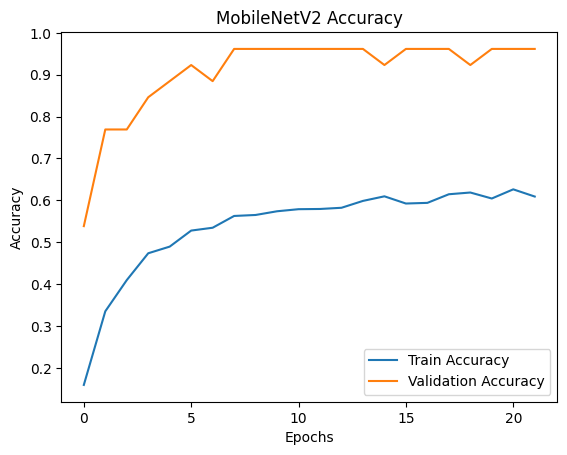

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import json

# Dataset paths
train_path = r"C:\Users\thula\Documents\Mini_Project\Dataset\training_set"
test_path = r"C:\Users\thula\Documents\Mini_Project\Dataset\test_set"

# Image size and batch size
IMG_SIZE = 64
BATCH_SIZE = 32

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Save class indices
with open("class_indices.json", "w") as f:
    json.dump(train_set.class_indices, f)

# Build model using MobileNetV2
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(26, activation='softmax')(x)  # 26 classes for A-Z

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_set,
    steps_per_epoch=120,
    epochs=50,
    validation_data=test_set,
    callbacks=[early_stopping]
)

# Save model
model.save('asl_mobilenetv2_model.h5')

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the model
model = load_model('asl_mobilenetv2_model.h5')

# Define the path to the test set
test_path = r"C:\Users\thula\Documents\Mini_Project\Dataset\test_set"

# Image size and batch size must match training
IMG_SIZE = 64
BATCH_SIZE = 32

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important for accurate evaluation
)

# Evaluate the model
loss, accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Found 26 images belonging to 26 classes.
1/1 [==============================] - 2s 2s/step - loss: 0.2060 - accuracy: 0.9615
Test Accuracy: 96.15%
